# Exam R

In [ ]:
NAME = "M.A.H.C.L. van Riel, 2018335"
COLLABORATORS = "W.F.M. van der Meiden, 2014236"

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages

In [1]:
library(tidyverse)
library(gvlma)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


# Assignment 1


## Data

The data are given:


In [52]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

In [53]:
head(df1)

V1,epsilon,response,group
3.588198,-3.3733866,-7.549782,1
8.094746,1.6755741,-11.513918,2
4.680792,0.3067462,-6.054838,1
8.947157,-2.2762739,-17.170587,2
9.464206,2.5076298,-13.420781,2
1.410008,0.8529284,1.032911,1


## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

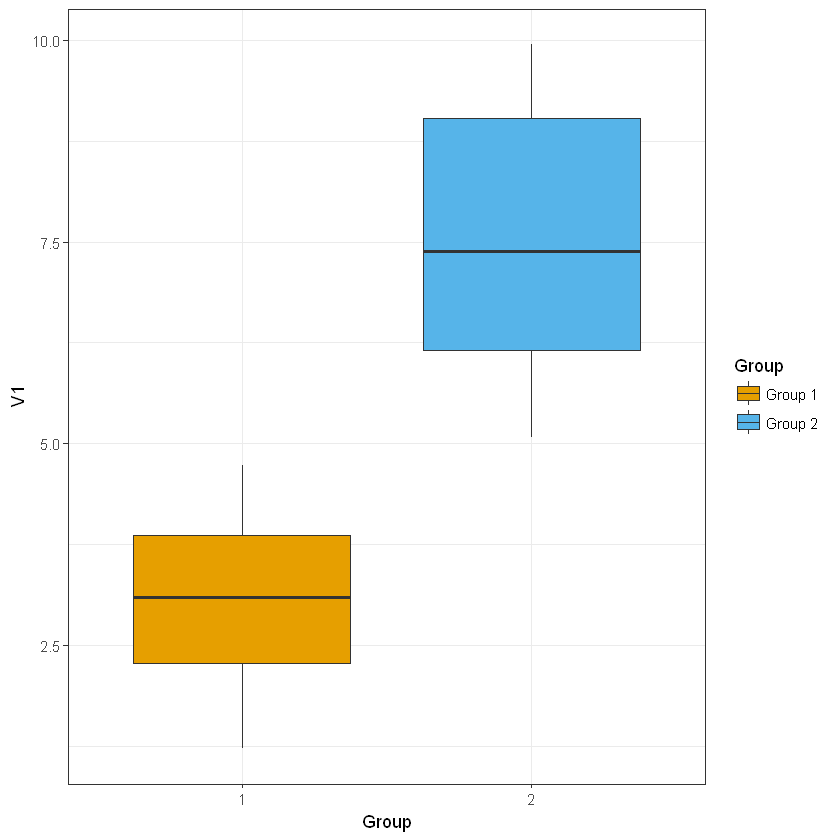

In [59]:
ggplot(df1, aes(factor(group), V1, fill = factor(group))) +
    geom_boxplot() +
    scale_fill_manual(name = "Group",
                      values=c("#E69F00", "#56B4E9"),
                      breaks = c('1', '2'),
                      labels = c('Group 1', 'Group 2')
                     ) +
    xlab('Group') +
    ylab('V1') +
    theme_bw()

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [60]:
reg1 <- lm(data = df1, response ~ V1)
summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [61]:
gvlma(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
      2.630       -1.915  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                      Value p-value                Decision
Global Stat        0.654319  0.9568 Assumptions acceptable.
Skewness           0.002398  0.9609 Assumptions acceptable.
Kurtosis           0.007200  0.9324 Assumptions acceptable.
Link Function      0.005852  0.9390 Assumptions acceptable.
Heteroscedasticity 0.638869  0.4241 Assumptions acceptable.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



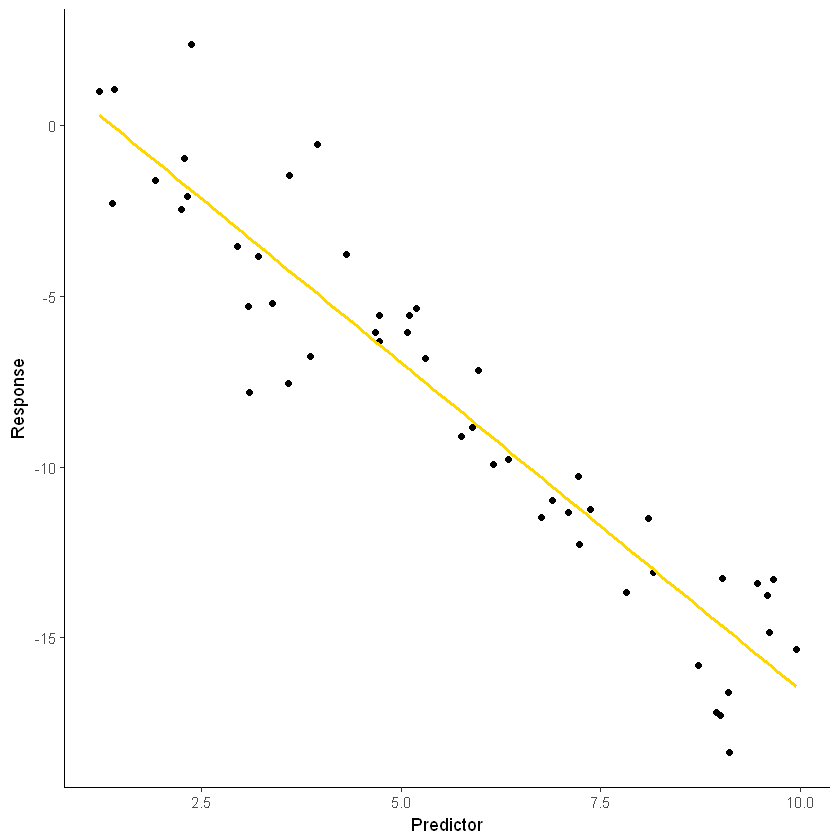

In [71]:
ggplot(df1, aes(V1, response)) +
    geom_point() +
    geom_smooth(method = 'lm', se = FALSE, col = 'gold') +
    xlab("Predictor") +
    ylab("Response") +
    theme_classic()

# Assigment 2

# Packages

In [5]:
install.packages("tmap")
install.packages(thematicmaps)
library(thematicmaps)
library(tidyverse)

package 'tmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\s160015\AppData\Local\Temp\Rtmp8QCTqu\downloaded_packages


ERROR: Error in install.packages(thematicmaps): object 'thematicmaps' not found


## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [2]:
map_municipal <- read.csv2("../Sourcedata/nld_municipal_map.csv")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.527548325,594393.827234474,1,FALSE,1,0.1
Appingedam,0,251427.775868901,594486.747111725,2,FALSE,1,0.1
Appingedam,0,251668.842999999,594646.77,3,FALSE,1,0.1
Appingedam,0,251713.521000002,594770.885000002,4,FALSE,1,0.1
Appingedam,0,251354.585000001,595461.381999999,5,FALSE,1,0.1
Appingedam,0,251310.272,596022.542,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

In [4]:
AddMapLayer(MapPlot(), map_municipal)


ERROR: Error in AddMapLayer(MapPlot(), map_municipal): could not find function "AddMapLayer"


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [19]:
pc4_locations <- read.csv2("../Sourcedata/nld_pc4_locations.csv") %>%
    mutate(X=as.numeric(as.character(X))) %>%
    mutate(Y=as.numeric(as.character(Y)))
str(pc4_locations)
head(pc4_locations)

ERROR: Error in read.csv2("../Sourcedata/nld_pc4_locations.csv") %>% mutate(X = as.numeric(as.character(X))) %>% : could not find function "%>%"


## Assignment 2d

### 2di

Read in the school data


In [7]:
schools <- read.csv2("../Sourcedata/schools.csv", StringsAsFactors = FALSE, dec = ".")
str(schools)

ERROR: Error in read.table(file = file, header = header, sep = sep, quote = quote, : unused argument (StringsAsFactors = FALSE)


### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [14]:
schools1 <- schools %>%

### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [15]:
school_loc <- 

## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


End of notebook